In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Условие 1: 
### Задача 1
#### 
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

1.1. Скачать данные в закрепе к уроку (данные по недвижимости) 

In [3]:
df = pd.read_csv('..\csv_files\kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


1.2 Изучите стоимости недвижимости

In [4]:
df.price.value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

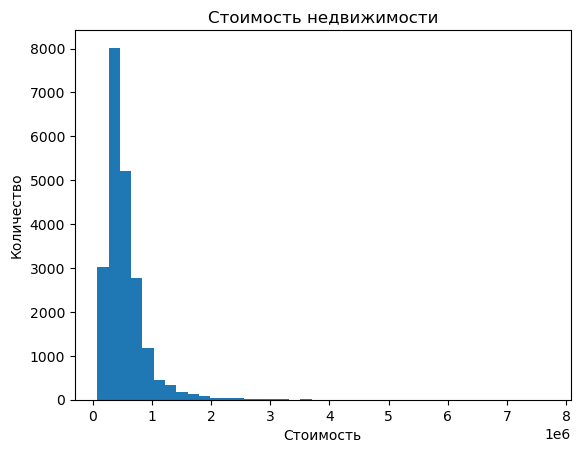

In [5]:
plt.Figure(figsize=(6,8))
plt.hist(df['price'], bins=40)
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

1.3 Изучите распределение квадратуры жилой

In [8]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

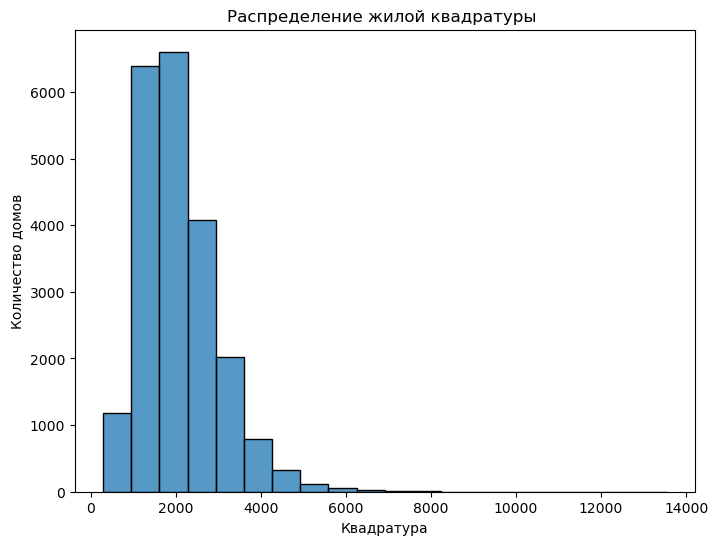

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение жилой квадратуры ')
plt.xlabel('Квадратура')
plt.ylabel('Количество домов');

1.4 Изучите распределение года постройки

In [18]:
df.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

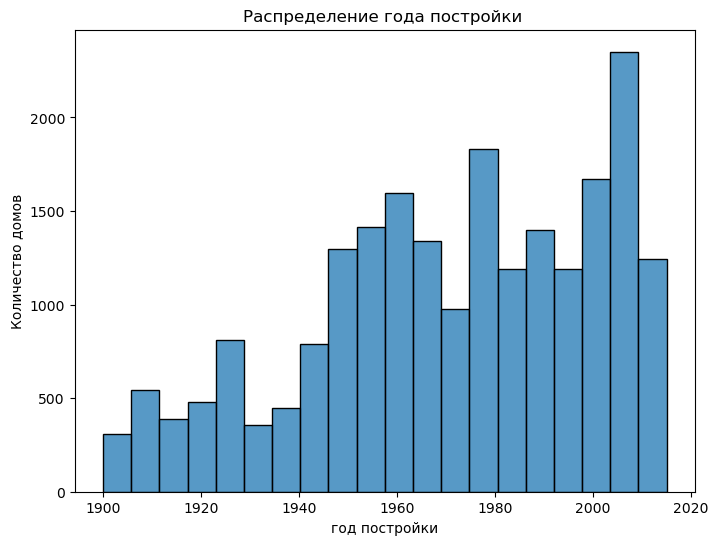

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(df['yr_built'], bins=20)
plt.title('Распределение года постройки ')
plt.xlabel('год постройки')
plt.ylabel('Количество домов');

## Условие 2: 
### 2 задача

2.1
Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

In [28]:
wf = df.waterfront.value_counts()
wf.index=['no','yes']
wf

no     21450
yes      163
Name: waterfront, dtype: int64

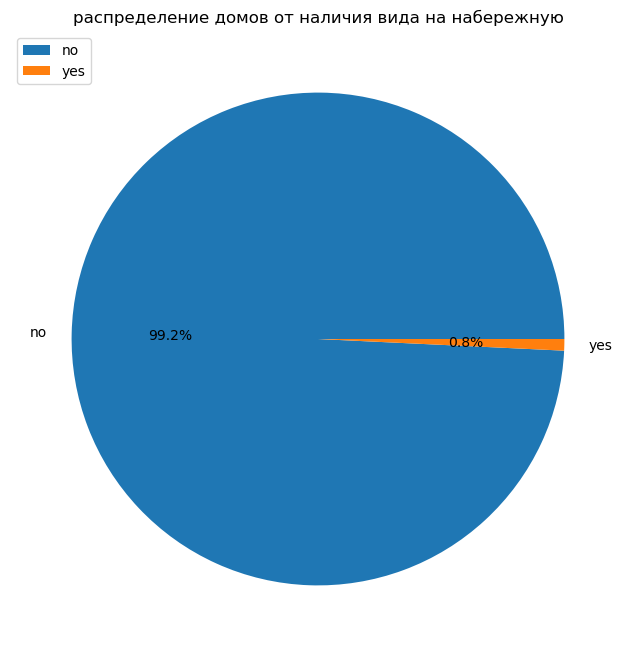

In [33]:
plt.figure(figsize=(10,8))
plt.pie(wf.values, autopct="%1.1f%%", labels = wf.index)
plt.title('распределение домов от наличия вида на набережную')
plt.legend(wf.index, loc='upper left');


2.2 Изучите распределение этажей домов

In [39]:
fl = df.floors.value_counts()
fl

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

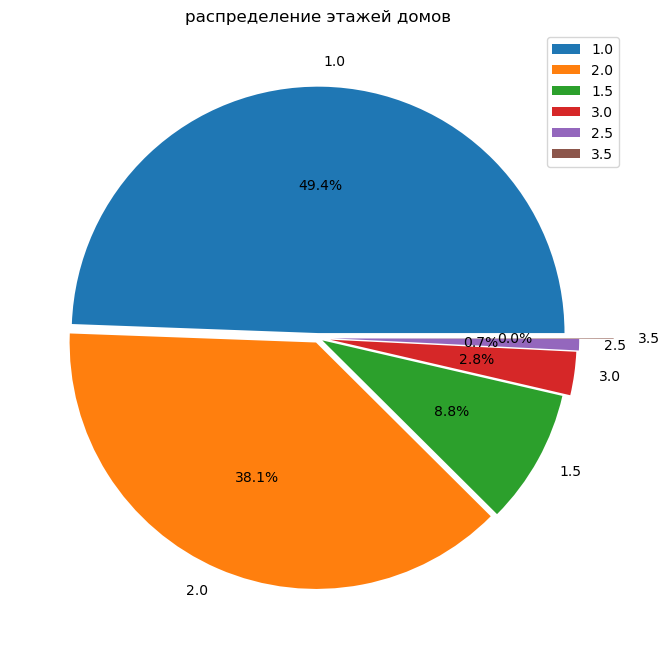

In [49]:
plt.figure(figsize=(10,8))
explode =[0.02, 0.02, 0.02, 0.05, 0.06, 0.2]
plt.pie(fl.values, autopct="%1.1f%%", labels = fl.index, explode=explode)
plt.title('распределение этажей домов')
plt.legend(fl.index, loc='upper right');

2.2 Изучите распределение состояния домов

In [52]:
cd= df.condition.value_counts()
cd

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

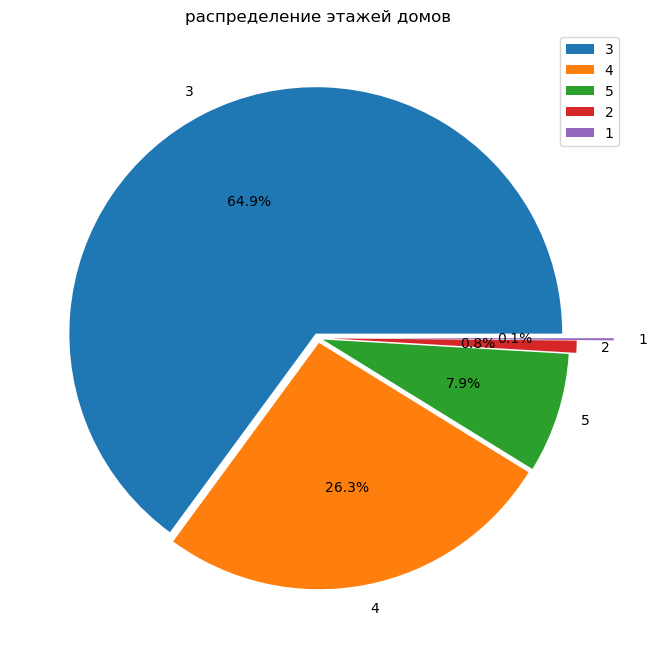

In [54]:
plt.figure(figsize=(10,8))
explode =[0.02, 0.02, 0.02, 0.05, 0.2]
plt.pie(cd.values, autopct="%1.1f%%", labels = cd.index, explode=explode)
plt.title('распределение этажей домов')
plt.legend(cd.index, loc='upper right');

## Условие 3:
### 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [62]:
corr_matr= df.corr()
corr_matr= np.round(corr_matr,1)
corr_matr[np.abs(corr_matr)<0.3] = 0
corr_matr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


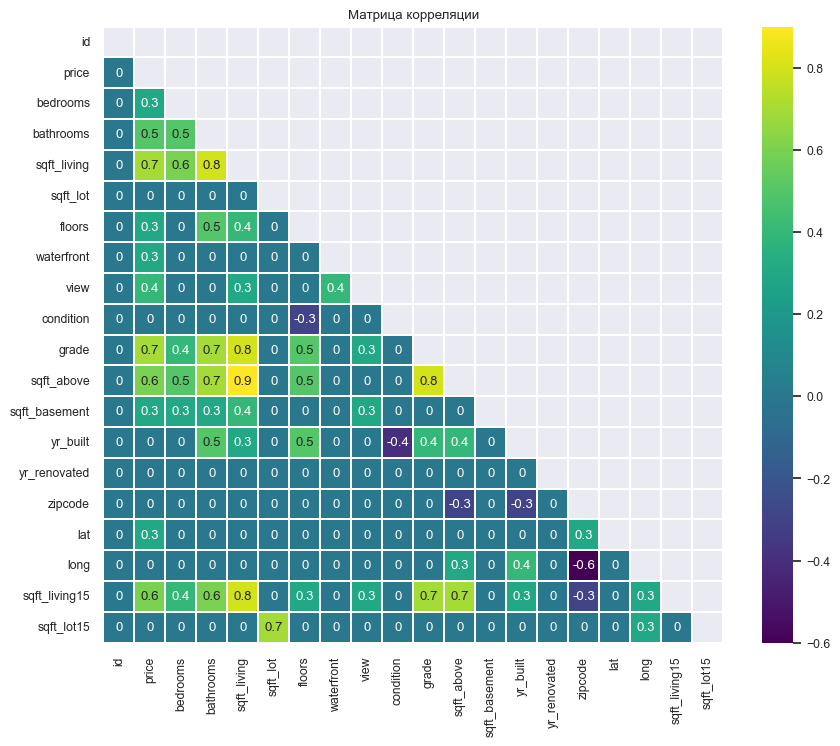

In [89]:
upp_mat = np.triu(df.corr())

plt.figure(figsize= (10,8))
plt.title('Матрица корреляции')
sns.set(font_scale=0.8)
sns.heatmap(corr_matr,annot=True,mask = upp_mat,
linewidths=0.2,
cmap='viridis');

<Figure size 800x600 with 0 Axes>

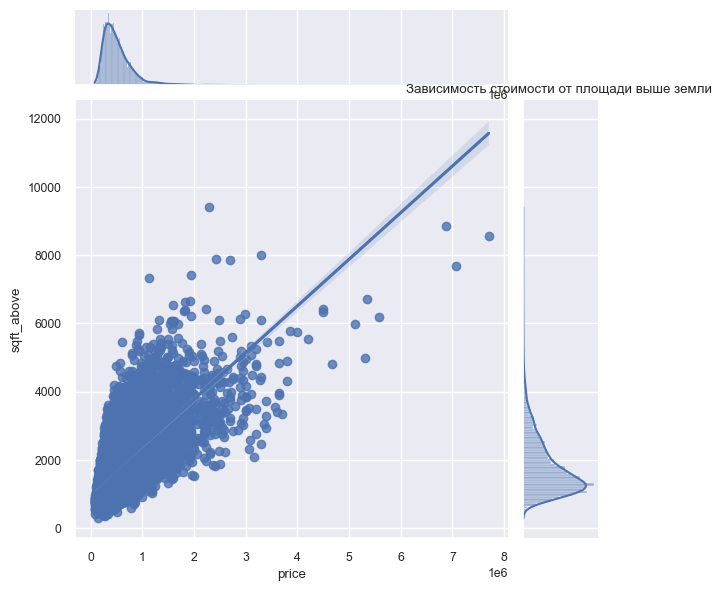

In [102]:
plt.figure(figsize= (8,6))
sns.jointplot(x=df['price'],
            y=df['sqft_above'],
            kind='reg'),
plt.title('Зависимость стоимости от площади выше земли ');

Чем больше площади выше земли, тем выше его стоимость

<Figure size 800x600 with 0 Axes>

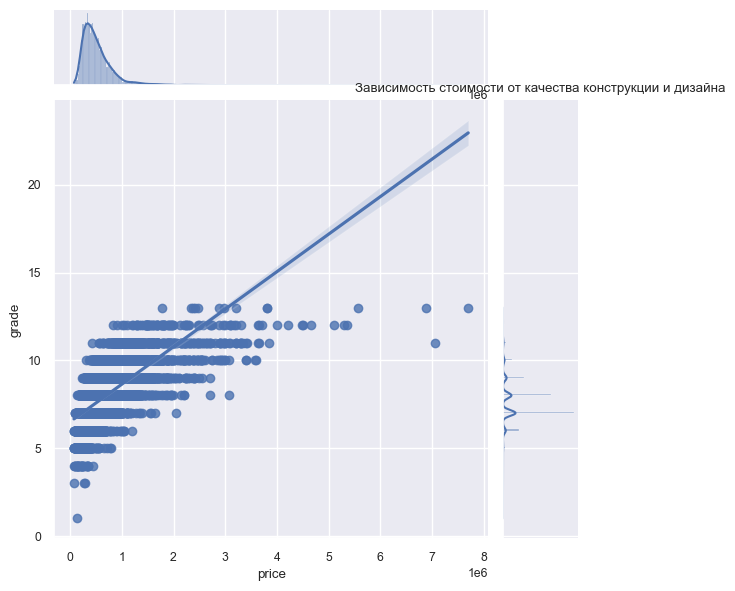

In [103]:
plt.figure(figsize= (8,6))
sns.jointplot(x=df['price'],
            y=df['grade'],
            kind='reg'),
plt.title('Зависимость стоимости от качества конструкции и дизайна');

Чем выше качество конструкции и дизайна дома, тем выше его стоимость

<Figure size 800x600 with 0 Axes>

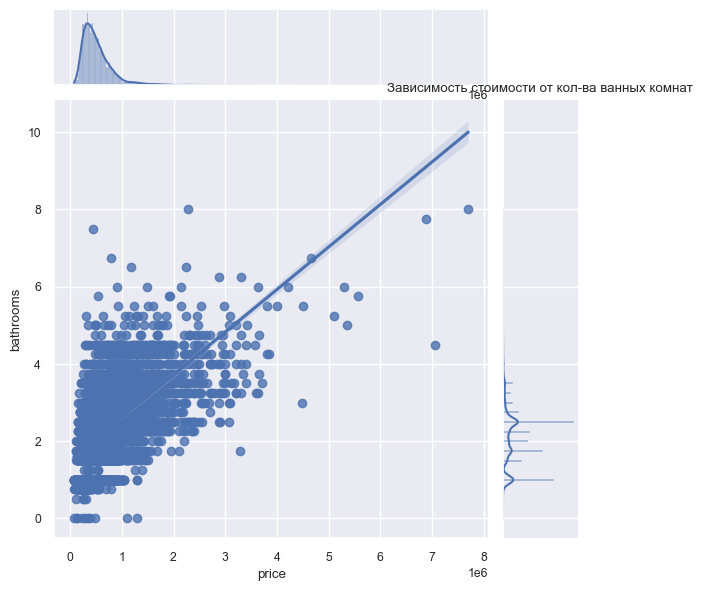

In [104]:
plt.figure(figsize= (8,6))
sns.jointplot(x=df['price'],
            y=df['bathrooms'],
            kind='reg'),
plt.title('Зависимость стоимости от кол-ва ванных комнат');

Чем больше кол-во ванных комнат, тем выше его стоимость

<Figure size 800x600 with 0 Axes>

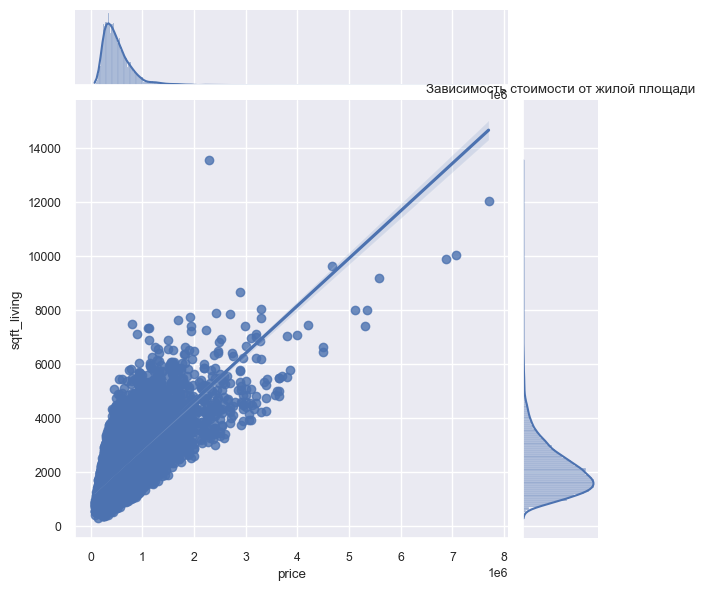

In [105]:
plt.figure(figsize= (8,6))
sns.jointplot(x=df['price'],
            y=df['sqft_living'],
            kind='reg'),
plt.title('Зависимость стоимости от жилой площади');

Чем больше жилплощадь дома, тем выше его стоимость

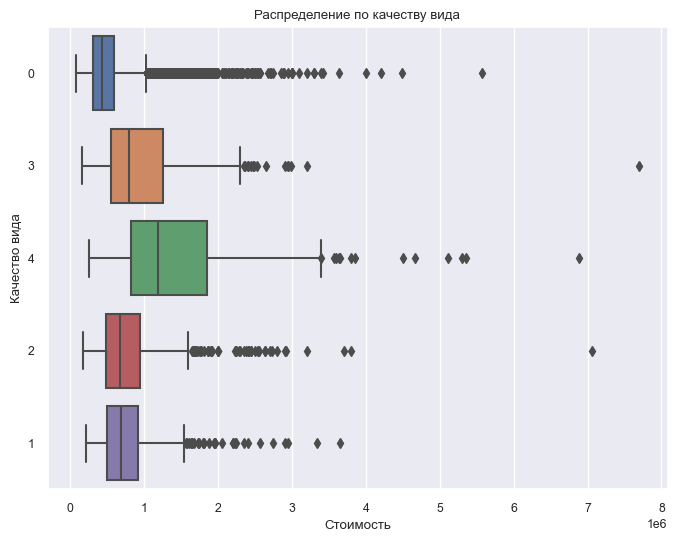

In [121]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5)
plt.title('Распределение по качеству вида')
plt.xlabel('Стоимость')
plt.ylabel('Качество вида');

Наибольшую стоимость имеют дома с оценкой вида 4

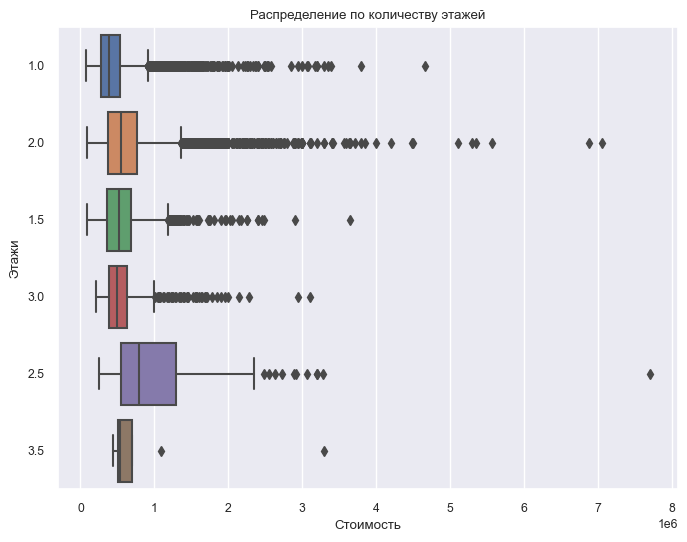

In [122]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5)
plt.title('Распределение по количеству этажей')
plt.xlabel('Стоимость')
plt.ylabel('Этажи');

Наибольшую стоимость имеют дома с количеством этажей 2,5

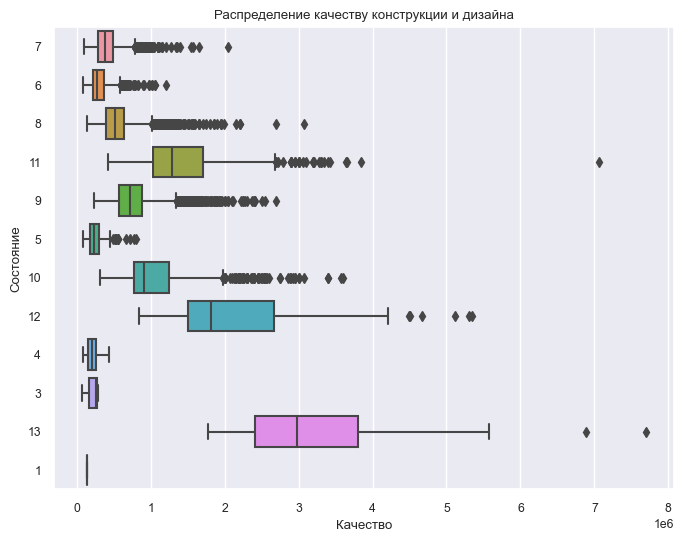

In [124]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)
plt.title('Распределение качеству конструкции и дизайна')
plt.xlabel('Качество')
plt.ylabel('Состояние');

Наибольшую стоимость имеют дома с оценкой конструкции и дизайна 13

id - -----------Уникальный ID для каждого дома
date ---------- Дата продажи дома
price --------- Стоимость продажи дома
bedrooms------- Кол-во спален
bathrooms------ Кол-во ванных комнат (0.5 - туалет без душа)
sqft_living --- Кв. метры жилые
sqft_lot ------ Кв. метры общие
floors -------- Кол-во этажей
waterfront ---- Есть набержная или нет
view ---------- Значение от 0 до 4 насколько хороший вид
condition ----- Значение от 1 до 5 насколько хорошее состояние
grade --------- Значение от 1 до 13, где 
                1-3 плохая конструкция здания и дизайн, 
                7 - средний уровень конструкции и дизайна, 
                11-13 -    высокое  качество конструкции и дизайна
sqft_above -----Кв. метры дома, которые находятся выше земли
sqft_basement --Кв. метры дома, которые находятся ниже земли
yr_built -------Год постройки дома
yr_renovated--- Год ремонта дома
zipcode ------- Индекс
lat ----------- Широтма
long ---------- Долгота
sqft_living15 - Кв. метры жилой площади у 15 соседей
sqft_lot15 -----Кв. метры общей площади у 15 соседей